## 1. Датасет "Iris Species"
Мы проводим исследование датасета для разведочного анализа данных и тестирования простых моделей прогнозирования. Датасет содержит 150 строк и 6 колонок.

Ссылка на датасет: https://www.kaggle.com/datasets/uciml/iris

In [40]:
import gmdh
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from gmdh import Combi, Ria
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Iris.csv')

## 2. Анализ датасета

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
display(df.head())
display(df.tail())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.shape

(150, 6)

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## 3. Машинное обучение
### 3.1. Разделение выборки

In [13]:
# Разделение признаков и целевой переменной
X = df.drop(['Id', 'Species'], axis=1)  # Удаляем столбец Id, он не нужен для обучения
y = df['Species']

In [14]:
# Проверка на наличие NaN
if X.isnull().any().any() or y.isnull().any():
    raise ValueError("Данные содержат пустые значения!")

In [16]:
# Преобразование целевой переменной в числовые значения
le = LabelEncoder()
y_encoded = le.fit_transform(y)

### 3.2. Масштабирование данных

In [17]:
# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [18]:
# Определяем базовые модели
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10)),
    ('lr', LogisticRegression(max_iter=200))
]

### 3.3. Обучение модели
### 3.3.1. Стекинг

In [19]:
# Создание стекированной модели
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=10)),
                               ('lr', LogisticRegression(max_iter=200))],
                   final_estimator=LogisticRegression())

### 3.3.2. Многослойный персептрон

In [20]:
# Обучение многослойного персептрона
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp_model.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

In [22]:
# Конвертация DataFrame в NumPy массивы
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

### 3.3.3. Линейный метод (COMBI)

In [24]:
# Линейный метод
combi_model = Combi()
combi_model.fit(X_train_np, y_train)

### 3.3.4. Нелинейный метод (RIA)

In [26]:
# Нелинейный метод
ria_model = Ria()
ria_model.fit(X_train_np, y_train)

## 4. Оценка качества моделей

In [27]:
# Оценка стекированной модели
stacking_pred = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

In [28]:
# Оценка многослойного персептрона
mlp_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

In [32]:
# Оценка линейной модели
combi_pred = combi_model.predict(X_test_np)
combi_pred = np.round(combi_pred).astype(int)  # Округление и приведение к целому числу
combi_accuracy = accuracy_score(y_test, combi_pred)

In [35]:
# Оценка нелинейной модели
ria_pred = ria_model.predict(X_test_np)  
ria_pred = np.round(ria_pred).astype(int)  # Округление и приведение к целому числу
ria_accuracy = accuracy_score(y_test, ria_pred)

In [36]:
# Сравнение качества моделей
results = {
    "Stacking Model Accuracy": stacking_accuracy,
    "MLP Model Accuracy": mlp_accuracy,
    "COMBI Model Accuracy": combi_accuracy,
    "RIA Model Accuracy": ria_accuracy
}

In [39]:
results

{'Stacking Model Accuracy': 1.0,
 'MLP Model Accuracy': 0.9666666666666667,
 'COMBI Model Accuracy': 1.0,
 'RIA Model Accuracy': 0.9666666666666667}

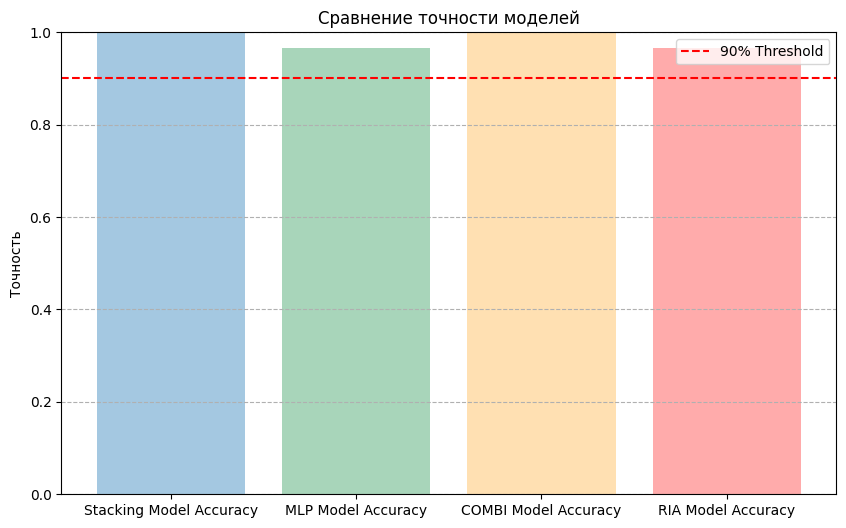

In [46]:
# Создание графика
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['#A4C8E1', '#A8D5BA', '#FFE0B2', '#FFABAB'])
plt.ylabel('Точность')
plt.title('Сравнение точности моделей')
plt.ylim(0, 1)  # Ограничение по оси Y от 0 до 1
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')  # Добавление пороговой линии
plt.legend()
plt.grid(axis='y', linestyle='--')

# Показать график
plt.show()